# This project is about using LIME to explain individual predictions in a Machine learning application.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\admin\Downloads\winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# number of rows and columns
print(f"Rows,columns: {df.shape}")

Rows,columns: (1599, 12)


In [5]:
# first five rows of the dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [6]:
#Missing values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
X_Features = [i for i in df.columns if df[i].dtype in [np.float]]
X_Features

C:\Users\admin\AppData\Local\Temp\ipykernel_15828\540444280.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_Features = [i for i in df.columns if df[i].dtype in [np.float]]


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [9]:
#another way to do it
numerical_features = df.select_dtypes(include=['float64']).columns.tolist()
numerical_features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
Y_Features = df.select_dtypes(include=['int64']).columns.tolist()
Y_Features

['quality']

The reason for choosing "quality" as the target variable is that it represents the overall quality of the red wine, which is likely the main focus or goal of the analysis
"quality" is a categorical variable with discrete values (ranging from 3 to 10 in this dataset), making it suitable for classification tasks. We can frame the problem as a classification problem where the goal is to classify wines into different quality categories based on their chemical composition

In [11]:
#Create classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
df['goodquality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [12]:
#another way using .apply along with lambda
df['goodquality'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df['goodquality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1599, dtype: int64

In [13]:
#proportion of good vs bad
df['goodquality'].value_counts()


0    1382
1     217
Name: goodquality, dtype: int64

In [33]:
X = df.drop(['goodquality','quality'],axis=1)
y = df['goodquality']

In [14]:
# Replace '1' with 'medium quality' in the 'goodquality' column.
#df['goodquality'] = df['goodquality'].replace({1: 'medium quality'})

In [34]:
#Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_Features = X
X = StandardScaler().fit_transform(X)

In [36]:
X #mean of 0 and a standard deviation of 1

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [45]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.30, random_state=0)

In [46]:
print(y_test.value_counts())

0    430
1     50
Name: goodquality, dtype: int64


In [48]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

In [51]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       430
           1       0.49      0.68      0.57        50

    accuracy                           0.89       480
   macro avg       0.72      0.80      0.75       480
weighted avg       0.91      0.89      0.90       480



# Conclusion

Precision and Recall:

For class 0 (presumably representing low-quality wine), the precision is high (0.96), indicating that when the model predicts an observation as low-quality, it is correct 96% of the time. However, the recall is slightly lower (0.92), suggesting that the model correctly identifies 92% of the actual low-quality wine samples.
For class 1 (presumably representing high-quality wine), the precision is lower (0.49), indicating that when the model predicts an observation as high-quality, it is correct only 49% of the time. However, the recall is higher (0.68), indicating that the model captures 68% of the actual high-quality wine samples.
F1-Score:

The F1-score for class 0 (low-quality wine) is 0.94, which is a harmonic mean of precision and recall for that class.
The F1-score for class 1 (high-quality wine) is 0.57.
Accuracy:

The overall accuracy of the model is 0.89, which means that the model correctly predicts the wine quality for 89% of the observations in the test set.
Support:

The support column represents the number of actual occurrences of each class in the test set. For example, there are 430 samples of class 0 and 50 samples of class 1.
Based on this analysis:

The model performs better in predicting low-quality wine compared to high-quality wine, as evidenced by higher precision and recall for class 0.
However, the model struggles with predicting high-quality wine, as indicated by lower precision and recall for class 1.

In [55]:
from sklearn.ensemble import RandomForestClassifier 
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       430
           1       0.64      0.58      0.61        50

    accuracy                           0.92       480
   macro avg       0.80      0.77      0.78       480
weighted avg       0.92      0.92      0.92       480



# Conclusion

Precision and Recall:

For class 0 (presumably representing low-quality wine), the precision is high (0.95), indicating that when the model predicts an observation as low-quality, it is correct 95% of the time. The recall is also high (0.96), suggesting that the model correctly identifies 96% of the actual low-quality wine samples.
For class 1 (presumably representing high-quality wine), both precision and recall are lower compared to class 0, with precision at 0.64 and recall at 0.58. This suggests that the model correctly identifies 64% of the actual high-quality wine samples and misclassifies 42% of low-quality wine samples as high-quality.
F1-Score:

The F1-score for class 0 (low-quality wine) is 0.96, indicating a high harmonic mean of precision and recall for that class.
The F1-score for class 1 (high-quality wine) is 0.61, suggesting a moderate balance between precision and recall for that class.
Accuracy:

The overall accuracy of the model is 0.92, which means that the model correctly predicts the wine quality for 92% of the observations in the test set.
Support:

The support column represents the number of actual occurrences of each class in the test set. There are 430 samples of class 0 and 50 samples of class 1.
Overall, the RandomForestClassifier appears to perform better than the DecisionTreeClassifier, particularly in terms of precision and recall for both classes.

In [67]:
from sklearn.ensemble import AdaBoostClassifier 
model3 = AdaBoostClassifier(random_state=1)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       430
           1       0.47      0.48      0.48        50

    accuracy                           0.89       480
   macro avg       0.70      0.71      0.71       480
weighted avg       0.89      0.89      0.89       480



# Conclusion

Precision and Recall:

For class 0 (presumably representing low-quality wine), the precision is 0.94, indicating that when the model predicts an observation as low-quality, it is correct 94% of the time. The recall is also 0.94, suggesting that the model correctly identifies 94% of the actual low-quality wine samples.
For class 1 (presumably representing high-quality wine), both precision and recall are lower compared to class 0, with precision at 0.47 and recall at 0.48. This suggests that the model correctly identifies 47% of the actual high-quality wine samples and misclassifies 52% of low-quality wine samples as high-quality.
F1-Score:

The F1-score for class 0 (low-quality wine) is 0.94, indicating a high harmonic mean of precision and recall for that class.
The F1-score for class 1 (high-quality wine) is 0.48, suggesting a relatively lower balance between precision and recall for that class.
Accuracy:

The overall accuracy of the model is 0.89, which means that the model correctly predicts the wine quality for 89% of the observations in the test set.
Support:

The support column represents the number of actual occurrences of each class in the test set. There are 430 samples of class 0 and 50 samples of class 1.
Overall, the AdaBoostClassifier performs reasonably well in predicting low-quality wine samples, with high precision and recall. 

# Overall Conclusion

Based on these metrics, the Random Forest Classifier seems to be the best-performing model among the three. It has higher precision, recall, and accuracy compared to the other models.

In [71]:
!pip install lime

     ------------------------------------ 275.7/275.7 kB 236.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=e69a0a5fb49a8ceecd011e790e1285d43e1fd6e182737458e0516025608fed57
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ac\fc\ba\bc2e218408e730b7ad32dc45fbaa1ae6f0ab314e581101bdff
Successfully built lime


In [73]:
import lime
import lime.lime_tabular

In [102]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
                    feature_names=X_Features,
                    class_names=['goodquality'],
                    #categorical_features=['goodquality'],
                    verbose=True, mode='regression')

In [96]:
print(y_test)

1109    0
1032    0
1002    1
487     0
979     0
       ..
801     0
61      0
431     0
1210    0
713     0
Name: goodquality, Length: 480, dtype: int64


In [97]:
print(y_test[0:3]) #First three rows

1109    0
1032    0
1002    1
Name: goodquality, dtype: int64


In [98]:
print(model1.predict(X_test[0:3])) #how our first model predicted the first three rows

[0 0 1]


In [99]:
print(y_test[20:25]) #our 2nd model classifier has given 1177 as bad quality but in the prediction it has classified as good quality

1177    1
549     0
1341    0
1235    0
191     0
Name: goodquality, dtype: int64


In [100]:
print(model2.predict(X_test[20:25])) #how our first model predicted the 20-25

[0 0 0 0 0]


In [103]:
exp = explainer.explain_instance(X_test[20],model2.predict)

Intercept -0.005423239995349761
Prediction_local [0.07385496]
Right: 0


Intercept -0.009050836450599016
Prediction_local [0.08663023]
Right: 0


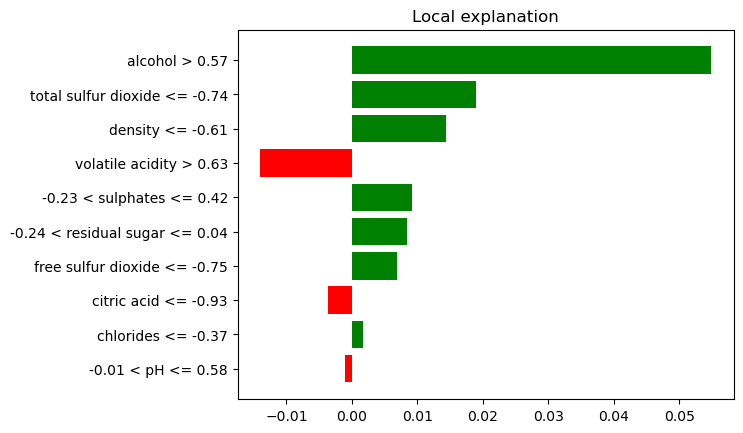

In [116]:

# Generate an explanation for a specific instance (e.g., X_test[20])
exp = explainer.explain_instance(X_test[20], model2.predict)

# Generate the explanation visualization as a pyplot figure
fig = exp.as_pyplot_figure()

# Display the explanation plot
plt.show()


The intercept value indicates the base prediction score for this instance. The prediction_local value indicates the local prediction score for the predicted class label. In this case, the local prediction score is 0.08663023 and The "Right" value indicates the correct class label for the instance. In this case, it is labeled as 0.


**Conclusion:**
- The local prediction score suggests that the model is not confident in its prediction for this instance, as the score is relatively low.
- The correct class label for the 20th data point is predicted as 0.